# Gradient algorithm for logistic regression - Thomas DESIRE


The [binary logistic regression model](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) is implemented in `scklearn` with the function [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression).
The goal here is to train a logistic regression model from scratch using gradient descent with backtracking line search.

### The logistic regression model
We recall some elements regarding the logistic regression model.

#### Joint observation: 
$\big\{x_1,\ldots,x_n\}\subset \mathbb{R}^p$, $\big\{y_1,\ldots,y_n\}\subset \{0,1\}$. Denote by $X \in \mathbb{R}^{n \times p}$ be the design matrix whose $i$-th row is $x_i \in \mathbb{R}^p$.

#### Predictor:
For $\beta \in \mathbb{R}^p$ and $x \in \mathbb{R}^p$, predict $y = 0$ if the score $\frac{\exp(\left\langle x, \beta \right\rangle )}{1 + \exp(\left\langle x, \beta \right\rangle )} \leq \frac{1}{2}$ and $y = 1$ otherwise

#### Model training:
Find the maximum likelihood, solve the following optimization problem
\begin{align*}
		{\arg\min}_{\beta\in \mathbb{R}^p} \qquad \mathrm{loss}(\beta) := \sum_{i=1}^n - y_i  \left\langle \beta, x_i\right\rangle + \log(1 + \exp( \left\langle \beta, x_i\right\rangle)).
\end{align*}

#### Gradient of the loss:
Let $P(\beta) \in \mathbb{R}^n$ bet the vector whose $i$-th entry is $\frac{\exp(\left\langle x_i, \beta \right\rangle )}{1 + \exp(\left\langle x_i, \beta \right\rangle )}$, the gradient of $F$ is then given by
\begin{align*}
		\nabla F(\beta) = X^T(P(\beta) - y)
\end{align*}


### Gradient descent with backtracking
We recall the gradient descent algorithm with backtracking line search. Choose $\beta_0 \in \mathbb{R}^p$ and $L_0 > 0$ and iterate
- for $k = 0, \ldots$:
- $L = L_0$
- $\beta_{k+1} = \beta_k - \frac{1}{L} \nabla F(\beta_k)$
- while $F(\beta_{k+1}) > F(\beta_k) - \frac{1}{2L} \|\nabla F(\beta_k)\|^2$:
    - $L = 2 \times L$
    - $\beta_{k+1} = \beta_k - \frac{1}{L} \nabla F(\beta_k)$


In [1]:
# In order for the matplotlib plots to be displayed directly below the code cell:
%matplotlib inline
# Imports the pyplot module from the matplotlib library:
from matplotlib import pyplot as plt
# Sets the default size of the figures created by matplotlib:
plt.rcParams['figure.figsize'] = [8, 6]

# Imports necessary libraries for mathematical and numerical operations:
import math as math
import numpy as np
import numpy.random as npr

## 1: Generate and plot training data
We will be working in dimension $p=2$.

We will consider a design matrix `X` represented as a 3 dimensional `numpy` array whose first two columns represent input point and third column is the constant $1$ for the intercept. 



In [2]:
### The code initializes variables, generates training data, and creates a design matrix X and labels y for logistic regression.

## Initialize a variable z which is equal to one:
z = 1 # The value 1 is assigned to the variable z. z is an integer.

## We set the seed for the random number generator:
npr.seed(123) # Sets the seed for the NumPy random number generator to 123.

## We define variables n, n2, and pDim (which we will use to construct y and X after):
n = 1000 # n is the total number of observations/"individuals"/data points, which is set to 1000. It is an integer.
n2 = int(n/2) # n2 is half of n, i.e. 500 (converted to an integer).
pDim = 2 # pDim is the dimensionality of the input space, set to the integer 2: we have two features, ...
# ... and each feature can vary independently. Input space = all possible combinations of values ...
# ... that these two features can take.

## We create a binary label vector y:
y = np.zeros((n,1)) # We initialize a column vector y (array) with only zeros; a matrix with 1000 "rows" and 1 column.
y[n2:n] = 1 # We assign the integer 1 to the second half of y: now, y is a vector of zeros and then ones.

## We generate a design matrix X:
X = npr.normal(0,1,(n,pDim+1)) # This generates a random array X with samples from a STANDARD normal distribution;
# and there are n=1000 rows and pDim+1=3 columns.
X[n2:n,:] = X[n2:n,:] + 3 # To the second half of the rows of X, we add 3 to the elements.
X[n2:n,0] = X[n2:n,0] + 2 # To THE FIRST COLUMN of the second half of the rows of X, we add 2 to the elements.
X[0:n2,:] = X[0:n2,:] + 1 # To the first half of the rows of X, we add 1 to the elements.
X[:,pDim] = 1 # We set the last column of X to 1 (it represents the intercept).

The function `plotReg` allows to represent the training data `X,y` and the decision boundary for a given paramter `beta`.

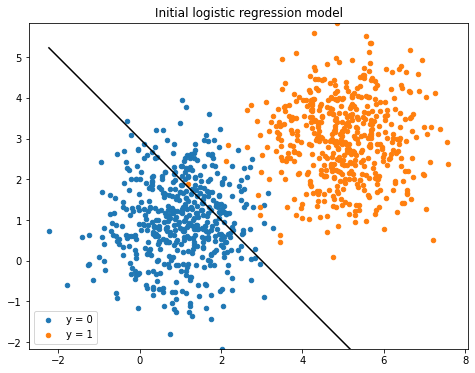

In [3]:
def plotReg(X,y,beta,s = 20, title = ""):
    ## Plot input data and classification boundary (only in 2D).
    ## X: design, the first two columns are ploted, the third column is full of ones for the intercept.
    ## y: labels in {0, 1}.
    ## beta: estimated parameter, third entry is the intercept.
    ## size: optional.
    ## title: optional.
    
    # Section 1:
    # Scatter plot the points based on their labels (y = 0 or y = 1):
    ysel = y.reshape((n,)) # It reshapes the label vector y to a 1D array.
    plt.scatter(X[ysel == 0,0], X[ysel == 0,1], s = s, label = 'y = 0') # It scatter plots the points where y = 0.
    plt.scatter(X[ysel == 1,0], X[ysel == 1,1], s = s, label = 'y = 1') # It scatter plots the points where y = 1.

    # Section 2:
    # Plot the decision boundary (by computing the coordinates of two points on the decision boundary line ...
    # ... based on the logistic regression parameters beta):
    a1 = np.min(X[:,0])
    a2 = np.max(X[:,0])
    b1 = -(beta[0] * a1 + beta[2]) / beta[1]
    b2 = -(beta[0] * a2 + beta[2]) / beta[1]
    plt.plot([a1,a2], [b1,b2], c = 'black')   

    # Section 3:
    # It sets plot parameters (such as the aspect ratio of the plot), the title, the y-axis limits based on ...
    # ... the minimum and maximum values of the second column of the design matrix X), and the legend.
    plt.axis('scaled')
    plt.title(title)
    plt.ylim(np.min(X[:,1]), np.max(X[:,1]))
    plt.legend()

# Initial estimate for the logisitic regression parameters:
betaZero = np.zeros((pDim+1,1)) # (Column 3x1)
betaZero[0] = 1
betaZero[1] = 1
betaZero[2] = -3

# Plot the result:
plotReg(X,y,betaZero, title = "Initial logistic regression model")

## 2: Implement the logistic loss and its gradient

In [4]:
# From the formulas given at the beginning of the document:

def logisticLoss(X, y, beta):
    # Evaluation of logistic loss, X design, y labels, beta parameters.
    loss = np.sum(-y * X.dot(beta) + np.log(1 + np.exp(X.dot(beta))))
    return loss

def logisticGrad(X, y, beta):
    # Evaluation of logistic loss gradient, X design, y labels, beta parameters.
    gradient = X.T.dot((np.exp(X.dot(beta)) / (1 + np.exp(X.dot(beta)))) - y)
    return gradient

We obtain the same outputs for `logisticLoss(X,y,betaZero)` and `logisticGrad(X,y,betaZero)`

In [5]:
print(logisticLoss(X,y,betaZero))
print(logisticGrad(X,y,betaZero))

#249.1078762596265
#[[195.01003612]
# [230.88791805]
# [153.56411163]]

249.1078762596265
[[195.01003612]
 [230.88791805]
 [153.56411163]]


## 3: Implement the gradient algorithm
We use the backtracking version outlined at the begining. We keep track of the value of the loss function and the norm of the gradient squared.

In [ ]:
## Gradient descent with backtracking line search for logistic regression.    
## X: design, the first two columns are ploted, the third column is full of ones for the intercept.
## y: labels in {0, 1}.
## beta0: initial model parameters.
## L0: initial value of L.
## iterat: maximum number of iterations.
## It returns:
    # Optimal model parameters beta.
    # A list containing the value of the loss at each iteration.
    # A list containing the norm of the gradient squared at each iteration.

In [8]:
def GradientDescent(X, y, beta0, L0=1, iterat=2000):

    # Initialization:
    beta = beta0
    list_loss = [logisticLoss(X, y, beta)] # A list containing the value of the loss at each iteration.
    list_gradient_norm_squared = [] # A list containing the norm of the gradient squared at each iteration.
    
    # Iteration:
    for _ in range(iterat):
        L = L0
        gradient = logisticGrad(X, y, beta)
        beta_new = beta - (1 / L) * gradient
        
        while logisticLoss(X, y, beta_new) > list_loss[-1] - (1 / (2 * L)) * np.linalg.norm(gradient)**2:
            L = 2 * L
            beta_new = beta - (1 / L) * gradient
        
        beta = beta_new
        list_loss.append(logisticLoss(X, y, beta))
        list_gradient_norm_squared.append(np.linalg.norm(gradient)**2)
    
    return beta, list_loss, list_gradient_norm_squared

In [10]:
# To initialize parameters:
beta0 = betaZero.copy()

# To run the gradient algorithm:
final_beta, loss_values, gradient_norm_squared_values = GradientDescent(X, y, beta0)

# Results:
print("Final beta:", final_beta)
print("Final loss:", loss_values[-1])
print("Final gradient norm squared:", gradient_norm_squared_values[-1])
print("Number of iterations:", len(loss_values))

<ipython-input-4-f859de5e5d42>:5: RuntimeWarning: overflow encountered in exp
  loss = np.sum(-y * X.dot(beta) + np.log(1 + np.exp(X.dot(beta))))


Final beta: [[  4.55225615]
 [  1.88324549]
 [-16.52542322]]
Final loss: 26.869372991949184
Final gradient norm squared: 5.076221953992789e-08
Number of iterations: 2001


In [8]:
# The warning message is a "RuntimeWarning" that indicates that an "overflow" was encountered 
# in the exponential function (in the logistic loss function). When we compute the exponentiation
# of the dot product of X and beta, we can have large values in this dot product which
# can lead to numerical instability (the exponential function result is too large to be represented within the
# floating-point precision of the data type).

We plot the final model estimate.

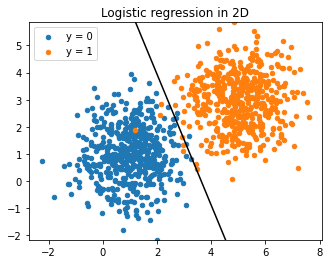

In [11]:
plt.rcParams['figure.figsize'] = [8, 4]
plotReg(X,y,final_beta, title = "Logistic regression in 2D") # plot the result

We plot the evolution of the loss function and the norm of the gradient. We use logarithmic scale on the y axis.

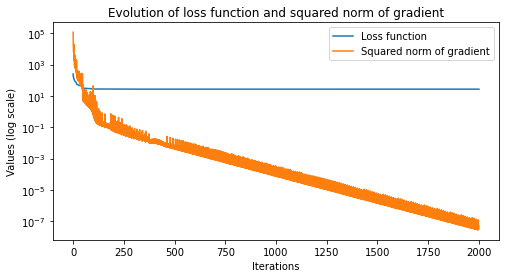

In [12]:
# We plot the evolution of the loss function and the squared norm of the gradient on the same graph:
plt.figure()

# Plot the loss function and the squared norm of the gradient:
plt.plot(loss_values, label='Loss function')
plt.plot(gradient_norm_squared_values, label='Squared norm of gradient')

# Set logarithmic scale on the y-axis, title, labels, legend and display the plot:
plt.yscale('log')
plt.title('Evolution of loss function and squared norm of gradient')
plt.xlabel('Iterations')
plt.ylabel('Values (log scale)')
plt.legend()
plt.show()

In [11]:
# We can see that the loss function quickly converges to a number a little bit above 10 (which is in fact 26.869372991949184
# according to the results of the gradient algorithm before). We know that if the learning rate is well-tuned, 
# the algorithm can efficiently navigate the parameter space and converge quickly; here, the backtracking
# line search is likely adjusting the effective learning rate during optimization. Moreover, since the loss quickly
# stabilizes around/at a certain value, this indicates that the algorithm is close to / at an optimal solution.

# We can see that the squared norm of the gradient decreases, to approximately 5.076221953992789e-08 (according to the
# results of the gradient algorithm before), which is obviously very close to 0.
# The (squared) norm of the gradient decreasing and converging to approximately 0 indicates that the
# algorithm is converging towards a critical point where the gradient is zero.
# In this case, the algorithm is finding a set of parameters that minimize the loss.

## 4: Compare with the output of `scikit-learn`
We determine the value of the options `penalty` and `fit_intercept` to be passed to the model.

In [13]:
from sklearn.linear_model import LogisticRegression
myModel = LogisticRegression(penalty='none', fit_intercept=False)

### penalty: The penalty term for regularization.
             # 'none' means no regularization.
### fit_intercept: Specifies if a constant (intercept) should be added to the decision function.
                   # We choose False because we already created an intercept column in the design matrix X.

We train the model on `X,y` using `myModel.fit`. We need to reshape `y` so that it has size `(n,)` instead of `(n,1)` to be compatible with scikit-learn.

In [14]:
# Reshape y to have size (n,):
y_reshaped = np.reshape(y, (n,))

# Train the model on X and y_reshaped using myModel.fit:
myModel.fit(X, y_reshaped)

LogisticRegression(fit_intercept=False, penalty='none')

We compare the value of `beta` we obtained with that of `scikit-learn`.


In [15]:
# We get the coefficients from scikit-learn:
coef_sklearn = myModel.coef_
intercept_sklearn = myModel.intercept_

# We compare the values:
print("Question 3 (beta from gradient descent):")
print(final_beta)

print("\nQuestion 4 (scikit-learn):")
print(coef_sklearn, intercept_sklearn)

Question 3 (beta from gradient descent):
[[  4.55225615]
 [  1.88324549]
 [-16.52542322]]

Question 4 (scikit-learn):
[[  4.55253946   1.88337267 -16.52644711]] [0.]


In [ ]:
# We get very similar values, with very small differences due to factors like numerical precision or
# the inherent randomness of certain optimization methods. Different implementations
# producing similar results suggests that the models are learning effectively.

## Bonus
We consider the same exercise with an L2-regularization term. We modify the loss function and the gradient, we compare with the output of `sklearn` and we try to obtain the same estimates.

In [ ]:
### CASE 1: WE EXCLUDE THE INTERCEPT:

In [16]:
def logisticLossL2(X, y, beta, lambda_reg):
    # L2 regularization term:
    regularization_term = lambda_reg * np.sum(beta[0:2]**2) # We exclude the intercept !
    # Computation:
    loss = np.sum(-y * X.dot(beta) + np.log(1 + np.exp(X.dot(beta)))) + regularization_term
    return loss

def logisticGradL2(X, y, beta, lambda_reg):  
    # L2 regularization gradient term:
    beta_modif = beta.copy()
    beta_modif[2] = 0 # The intercept has been excluded !
    regularization_gradient = 2 * lambda_reg * beta_modif
    # Computation:
    gradient = X.T.dot((np.exp(X.dot(beta)) / (1 + np.exp(X.dot(beta)))) - y) + regularization_gradient
    return gradient

In [17]:
def GradientDescentL2(X, y, beta0, lambda_reg, L0=1, iterat=2000):
    ## Gradient descent with L2 regularization and backtracking line search for logistic regression.
    
    # Initialization:
    beta = beta0
    list_loss = [logisticLossL2(X, y, beta, lambda_reg)]
    list_gradient_norm_squared = []
    
    # Iteration:
    for _ in range(iterat):
        L = L0
        gradient = logisticGradL2(X, y, beta, lambda_reg)
        beta_new = beta - (1 / L) * gradient
        
        while logisticLossL2(X, y, beta_new, lambda_reg) > list_loss[-1] - (1 / (2 * L)) * np.linalg.norm(gradient)**2:
            L = 2 * L
            beta_new = beta - (1 / L) * gradient
        
        beta = beta_new
        list_loss.append(logisticLossL2(X, y, beta, lambda_reg))
        list_gradient_norm_squared.append(np.linalg.norm(gradient)**2)
    
    return beta, list_loss, list_gradient_norm_squared

# To initialize parameters:
beta0 = betaZero.copy()

# Regularization strength:
lambda_reg = 0.5

# To run the gradient algorithm with L2 regularization:
final_beta_L2, loss_values_L2, gradient_norm_squared_values_L2 = GradientDescentL2(X, y, beta0, lambda_reg)

# Results:
print("Final beta with L2 regularization:", final_beta_L2)
print("Final loss with L2 regularization:", loss_values_L2[-1])
print("Final gradient norm squared with L2 regularization:", gradient_norm_squared_values_L2[-1])
print("Number of iterations with L2 regularization:", len(loss_values_L2))

Final beta with L2 regularization: [[  3.42272396]
 [  1.43724878]
 [-12.59666181]]
Final loss with L2 regularization: 35.57943354521061
Final gradient norm squared with L2 regularization: 4.096166145289989e-12
Number of iterations with L2 regularization: 2001


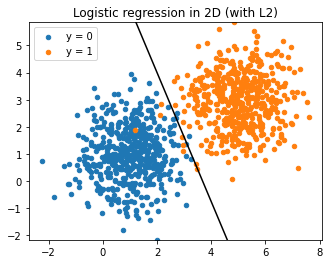

In [18]:
# Plot of the final model estimate:

plt.rcParams['figure.figsize'] = [8, 4]
plotReg(X,y,final_beta_L2, title = "Logistic regression in 2D (with L2)") # plot the result

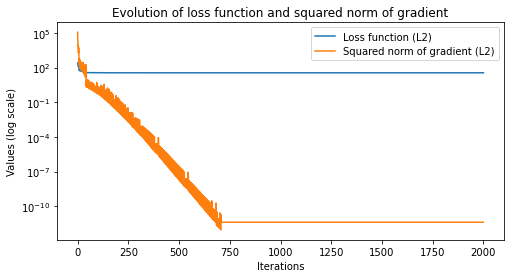

In [19]:
# We plot the evolution of the loss function and the squared norm of the gradient on the same graph:
plt.figure()

# Plot the loss function and the squared norm of the gradient:
plt.plot(loss_values_L2, label='Loss function (L2)')
plt.plot(gradient_norm_squared_values_L2, label='Squared norm of gradient (L2)')

# Set logarithmic scale on the y-axis, title, labels, legend and display the plot:
plt.yscale('log')
plt.title('Evolution of loss function and squared norm of gradient')
plt.xlabel('Iterations')
plt.ylabel('Values (log scale)')
plt.legend()
plt.show()

In [ ]:
# The (squared) norm of the gradient converges faster.

In [20]:
# With scikit-learn:

myModel2 = LogisticRegression(penalty='l2', fit_intercept=False)

myModel2.fit(X, y_reshaped)

# We get the coefficients from scikit-learn:
coef2_sklearn = myModel2.coef_
intercept2_sklearn = myModel2.intercept_

# We compare the values:
print("With gradient descent:")
print(final_beta_L2)

print("\nWith scikit-learn:")
print(coef2_sklearn, intercept2_sklearn)

With gradient descent:
[[  3.42272396]
 [  1.43724878]
 [-12.59666181]]

With scikit-learn:
[[ 2.13704033  0.75042903 -7.45151889]] [0.]


In [ ]:
# Conclusion: we do not get the same estimates here.

In [ ]:
### CASE 2: WE DO NOT EXCLUDE THE INTERCEPT:

In [21]:
def logisticLossL2(X, y, beta, lambda_reg):
    # L2 regularization term:
    regularization_term = lambda_reg * np.sum(beta**2) # We DO NOT exclude the intercept !
    # Computation:
    loss = np.sum(-y * X.dot(beta) + np.log(1 + np.exp(X.dot(beta)))) + regularization_term
    return loss

def logisticGradL2(X, y, beta, lambda_reg):  
    # L2 regularization gradient term:
    regularization_gradient = 2 * lambda_reg * beta
    # Computation:
    gradient = X.T.dot((np.exp(X.dot(beta)) / (1 + np.exp(X.dot(beta)))) - y) + regularization_gradient
    return gradient

In [22]:
# To initialize parameters:
beta0 = betaZero.copy()

# Regularization strength:
lambda_reg = 0.5

# To run the gradient algorithm with L2 regularization:
final_beta_L2, loss_values_L2, gradient_norm_squared_values_L2 = GradientDescentL2(X, y, beta0, lambda_reg)

# Results:
print("Final beta with L2 regularization:", final_beta_L2)
print("Final loss with L2 regularization:", loss_values_L2[-1])
print("Final gradient norm squared with L2 regularization:", gradient_norm_squared_values_L2[-1])
print("Number of iterations with L2 regularization:", len(loss_values_L2))

Final beta with L2 regularization: [[ 2.13703901]
 [ 0.75042788]
 [-7.45151278]]
Final loss with L2 regularization: 76.97833159387882
Final gradient norm squared with L2 regularization: 3.552395045319911e-14
Number of iterations with L2 regularization: 2001


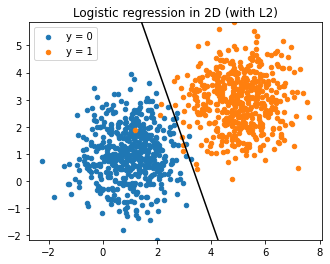

In [23]:
# Plot of the final model estimate:

plt.rcParams['figure.figsize'] = [8, 4]
plotReg(X,y,final_beta_L2, title = "Logistic regression in 2D (with L2)") # plot the result

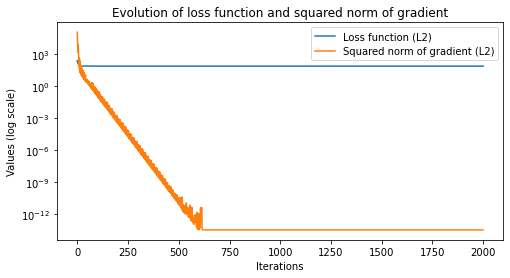

In [24]:
# We plot the evolution of the loss function and the squared norm of the gradient on the same graph:
plt.figure()

# Plot the loss function and the squared norm of the gradient:
plt.plot(loss_values_L2, label='Loss function (L2)')
plt.plot(gradient_norm_squared_values_L2, label='Squared norm of gradient (L2)')

# Set logarithmic scale on the y-axis, title, labels, legend and display the plot:
plt.yscale('log')
plt.title('Evolution of loss function and squared norm of gradient')
plt.xlabel('Iterations')
plt.ylabel('Values (log scale)')
plt.legend()
plt.show()

In [27]:
# We compare the values:
print("With gradient descent:")
print(final_beta_L2)

print("\nWith scikit-learn:")
print(coef2_sklearn, intercept2_sklearn)

With gradient descent:
[[ 2.13703901]
 [ 0.75042788]
 [-7.45151278]]

With scikit-learn:
[[ 2.13704033  0.75042903 -7.45151889]] [0.]


In [ ]:
# Conclusion: we get the same estimates here !